In [1]:
import numpy as np
from Averager import Averager
from ResultsFile import ResultsFile

import matplotlib.pyplot as plt

In [2]:
'''
#this snippet creates some averaged files 
for i in [1985,1987,1996,2007,2008,2009,2010,2011,2012,2013,2014,2015]:
    filePaths = []
    filePaths2 = []
    filePaths3 = []
    filePaths4 = []
    for j in range(5):
        filePaths.append(f"../results/2035_{i}_{j}_pp.txt")
        filePaths2.append(f"../results/2035_{i}_{j}_nuPrio_pp.txt")        
        filePaths3.append(f"../results/2035_{i}_{j}.txt")
        filePaths4.append(f"../results/2035_{i}_{j}_nuPrio.txt")
    Averager.Average(filePaths,f"../results/averaged/nonNuPrio2035_{i}_pp.txt")
    Averager.Average(filePaths2,f"../results/averaged/NuPrio2035_{i}_pp.txt")
    Averager.Average(filePaths3,f"../results/averaged/nonNuPrio2035_{i}.txt")
    Averager.Average(filePaths4,f"../results/averaged/NuPrio2035_{i}.txt")
    '''
#

'\n#this snippet creates some averaged files \nfor i in [1985,1987,1996,2007,2008,2009,2010,2011,2012,2013,2014,2015]:\n    filePaths = []\n    filePaths2 = []\n    filePaths3 = []\n    filePaths4 = []\n    for j in range(5):\n        filePaths.append(f"../results/2035_{i}_{j}_pp.txt")\n        filePaths2.append(f"../results/2035_{i}_{j}_nuPrio_pp.txt")        \n        filePaths3.append(f"../results/2035_{i}_{j}.txt")\n        filePaths4.append(f"../results/2035_{i}_{j}_nuPrio.txt")\n    Averager.Average(filePaths,f"../results/averaged/nonNuPrio2035_{i}_pp.txt")\n    Averager.Average(filePaths2,f"../results/averaged/NuPrio2035_{i}_pp.txt")\n    Averager.Average(filePaths3,f"../results/averaged/nonNuPrio2035_{i}.txt")\n    Averager.Average(filePaths4,f"../results/averaged/NuPrio2035_{i}.txt")\n    '

In [3]:
res = ResultsFile("../results/averaged/NuPrio2035_2009.txt")
respp = ResultsFile("../results/averaged/NuPrio2035_2009_pp.txt")
#keywords = ["Solar","Wind","ROR","MustRun","ICHP","Nuclear","NuclearSweden","NuclearFinland","Kernekraft_DE","Borssele","NuclearGB","NuclearFR","NuclearBE","NuclearES","NuclearCH","NuclearCZSK","NuclearHU","nuclear","Nuclear"]
'''
Hvad skal der ske?
Jeg vil gerne undersøge overskudsproduktion i Danmark. Jeg kan starte med at kigge på hyppigheden af det.
Det må være varsurplus minus neteksport (plus netimport), der tilsammen giver overskudsproduktion. 
'''
#

'\nHvad skal der ske?\nJeg vil gerne undersøge overskudsproduktion i Danmark. Jeg kan starte med at kigge på hyppigheden af det.\nDet må være varsurplus minus neteksport (plus netimport), der tilsammen giver overskudsproduktion. \n'

(0.0, 600.0)

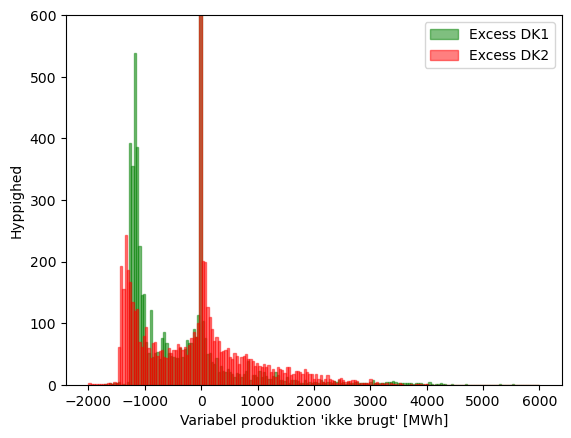

In [4]:
excessDK1 = res.getColumn("DK1_varSurplus")+res.getColumn("DK1_netImport")
excessDK2 = res.getColumn("DK2_varSurplus")+res.getColumn("DK2_netImport")

binsDK1 = np.linspace(-2000,6000,200)
plt.hist(excessDK1,alpha=0.5,bins=binsDK1,label="Excess DK1",edgecolor = "green",color = "green")
plt.hist(excessDK2,alpha=0.5,bins=binsDK1,label="Excess DK2",edgecolor = "red",color = "red")
plt.legend()
plt.xlabel("Variabel produktion 'ikke brugt' [MWh]")
plt.ylabel("Hyppighed")
plt.ylim(0,600)

(0.0, 300.0)

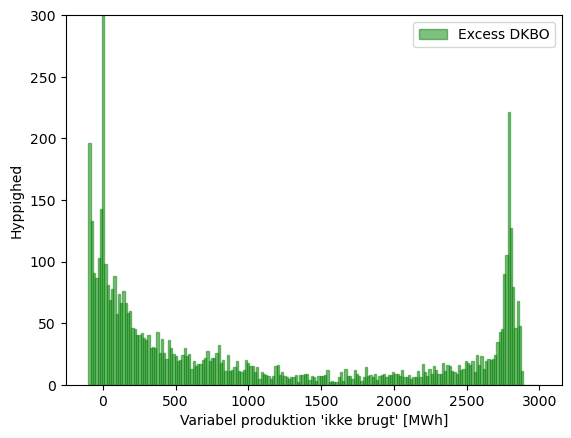

In [5]:
#hvad med energiø bonholm?
excessDK1 = res.getColumn("DKBO_varSurplus")+res.getColumn("DKBO_netImport")

binsDK1 = np.linspace(-100,3000,200)
plt.hist(excessDK1,alpha=0.5,bins=binsDK1,label="Excess DKBO",edgecolor = "green",color = "green")
plt.legend()
plt.xlabel("Variabel produktion 'ikke brugt' [MWh]")
plt.ylabel("Hyppighed")
plt.ylim(0,300)

In [6]:
#det ser ud til at energiø bornholm relativt ofte har et ret stort overskud af variabel produktion. Man burde se hvordan det kobler til nabo-landene. DKBO er forbundet med:
res.getNode("DKBO").relevantNames

['DKBO_Wind',
 'DKBO_Solar',
 'DKBO_CKV_EX',
 'DKBO_CKV_DI',
 'DKBO_KYV22',
 'DKBO_to_SE4',
 'DKBO_to_DK2',
 'DKBO_to_DELU']

Text(0, 0.5, 'Overskud af variabel produktion (før eksport), DK2 [MWh]')

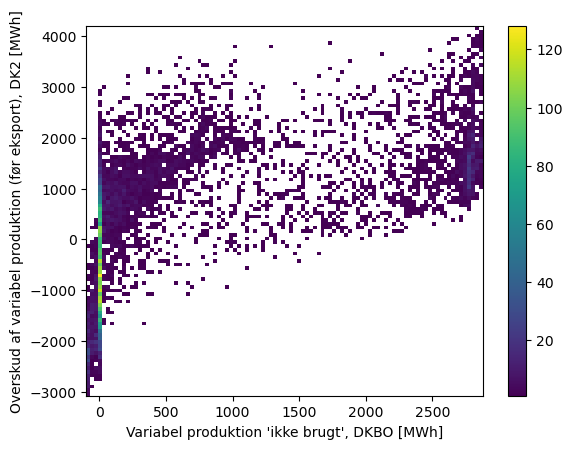

In [13]:
#linjen til SE4 er meget lille og kan ignoreres fuldstændigt. Hvordan er situationen i DELU og DK2?
excessDKBO = res.getColumn("DKBO_varSurplus")+res.getColumn("DKBO_netImport")
varSurplusDK2 = res.getColumn("DK2_varSurplus")
fig, ax = plt.subplots()
h = ax.hist2d(excessDKBO, varSurplusDK2, bins=100,cmin = 1)
fig.colorbar(h[3], ax=ax)
ax.set_xlabel("Variabel produktion 'ikke brugt', DKBO [MWh]")
ax.set_ylabel("Overskud af variabel produktion (før eksport), DK2 [MWh]")

Text(0, 0.5, 'Overskud af variabel produktion (før eksport), DELU [MWh]')

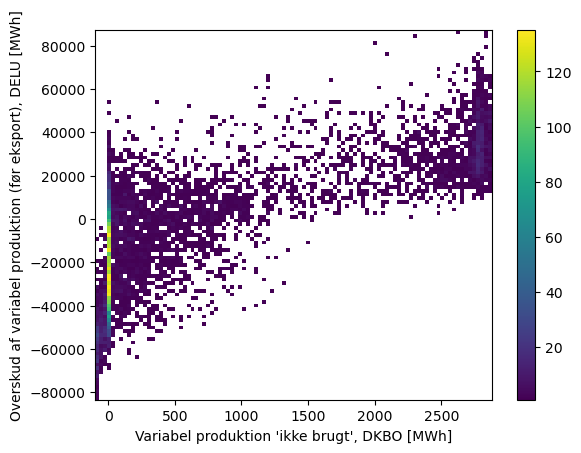

In [14]:
#linjen til SE4 er meget lille og kan ignoreres fuldstændigt. Hvordan er situationen i DELU og DK2?
excessDKBO = res.getColumn("DKBO_varSurplus")+res.getColumn("DKBO_netImport")
varSurplusDELU = res.getColumn("DELU_varSurplus")
fig, ax = plt.subplots()
h = ax.hist2d(excessDKBO, varSurplusDELU, bins=100,cmin = 1)
fig.colorbar(h[3], ax=ax)
ax.set_xlabel("Variabel produktion 'ikke brugt', DKBO [MWh]")
ax.set_ylabel("Overskud af variabel produktion (før eksport), DELU [MWh]")

Text(0, 0.5, 'Produktion fra vind, DELU [MWh]')

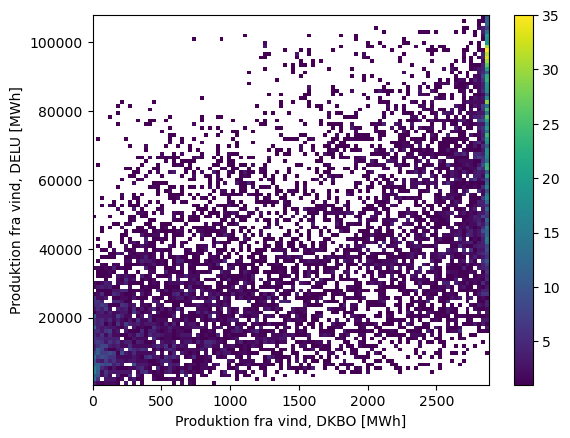

In [15]:
#hvordan er produktionen af vind koblet i områderne?
windDKBO = res.getColumn("DKBO_Wind")
windDELU = res.getColumn("DELU_Wind")
fig, ax = plt.subplots()
h = ax.hist2d(windDKBO, windDELU, bins=100,cmin = 1)
fig.colorbar(h[3], ax=ax)
ax.set_xlabel("Produktion fra vind, DKBO [MWh]")
ax.set_ylabel("Produktion fra vind, DELU [MWh]")

Det handler måske bare om, at timeserien fra DKBO ikke er super. Jeg kan prøve igen med DKEI, som er den vestlige energiø.

(0.0, 300.0)

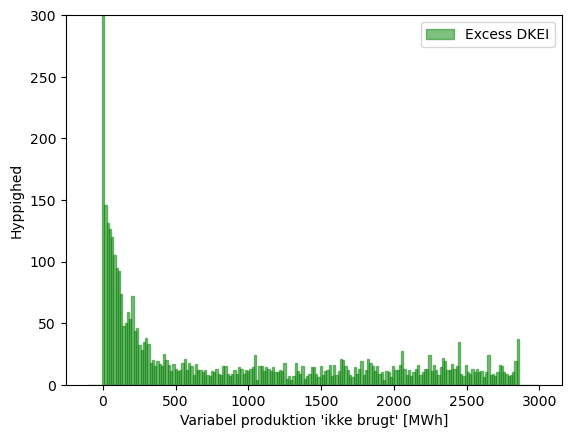

In [16]:
#hvad med energiø bonholm?
excessDK1 = res.getColumn("DKEI_varSurplus")+res.getColumn("DKEI_netImport")

binsDK1 = np.linspace(-100,3000,200)
plt.hist(excessDK1,alpha=0.5,bins=binsDK1,label="Excess DKEI",edgecolor = "green",color = "green")
plt.legend()
plt.xlabel("Variabel produktion 'ikke brugt' [MWh]")
plt.ylabel("Hyppighed")
plt.ylim(0,300)

In [17]:
#denne er ikke lige så skarpt peaket ved høj produktion, grunden er nok at timeserien i DKBO er lidt wonky og har rigtigt mange timer ved den maksimale værdi.
res.getNode("DKEI").relevantNames

['DKEI_Wind', 'DKEI_to_DK1', 'DKEI_to_BE']

Text(0, 0.5, 'Overskud af variabel produktion (før eksport), DK1 [MWh]')

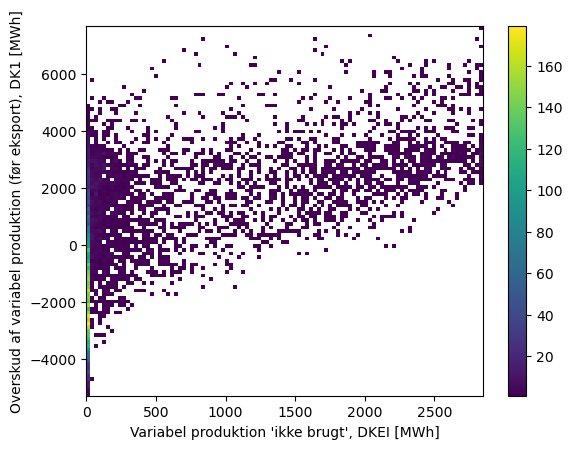

In [18]:
excessDKEI = res.getColumn("DKEI_varSurplus")+res.getColumn("DKEI_netImport")
varSurplusDK1 = res.getColumn("DK1_varSurplus")
fig, ax = plt.subplots()
h = ax.hist2d(excessDKEI, varSurplusDK1, bins=100,cmin = 1)
fig.colorbar(h[3], ax=ax)
ax.set_xlabel("Variabel produktion 'ikke brugt', DKEI [MWh]")
ax.set_ylabel("Overskud af variabel produktion (før eksport), DK1 [MWh]")

Text(0, 0.5, 'Overskud af variabel produktion (før eksport), BE [MWh]')

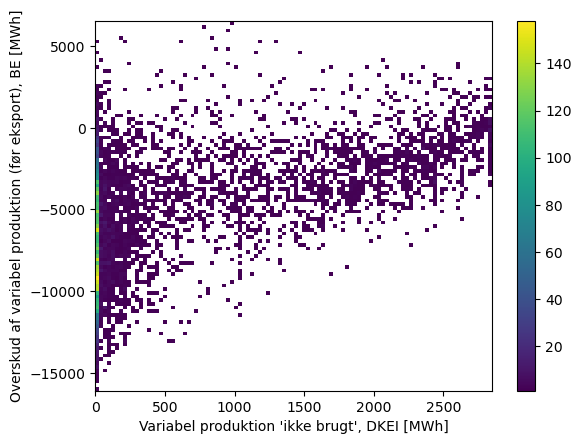

In [19]:
excessDKEI = res.getColumn("DKEI_varSurplus")+res.getColumn("DKEI_netImport")
varSurplusBE = res.getColumn("BE_varSurplus")
fig, ax = plt.subplots()
h = ax.hist2d(excessDKEI, varSurplusBE, bins=100,cmin = 1)
fig.colorbar(h[3], ax=ax)
ax.set_xlabel("Variabel produktion 'ikke brugt', DKEI [MWh]")
ax.set_ylabel("Overskud af variabel produktion (før eksport), BE [MWh]")

Når DKEI ikke kan eksportere må det være fordi overskuddet i DK1 og BE konspirerer til at være højt samtidigt:

Text(0, 0.5, 'Overskud af variabel produktion (før eksport), DK1+BE [MWh]')

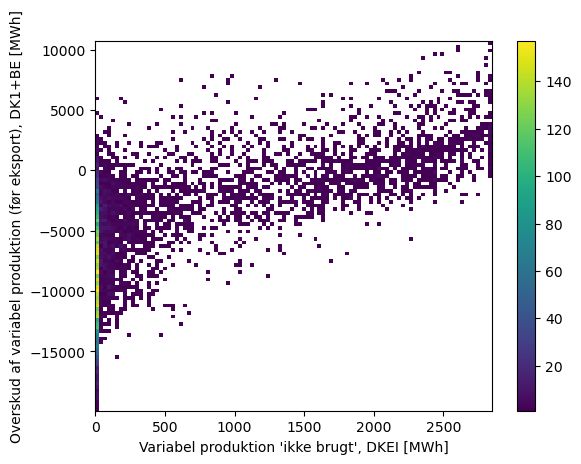

In [20]:
excessDKEI = res.getColumn("DKEI_varSurplus")+res.getColumn("DKEI_netImport")
varSurplusBE = res.getColumn("BE_varSurplus")+res.getColumn("DK1_varSurplus")
fig, ax = plt.subplots()
h = ax.hist2d(excessDKEI, varSurplusBE, bins=100,cmin = 1)
fig.colorbar(h[3], ax=ax)
ax.set_xlabel("Variabel produktion 'ikke brugt', DKEI [MWh]")
ax.set_ylabel("Overskud af variabel produktion (før eksport), DK1+BE [MWh]")

Det er generelt timer, hvor DK1 og BE selv eksporterer energi:

Text(0, 0.5, 'Eksport, DK1+BE [MWh]')

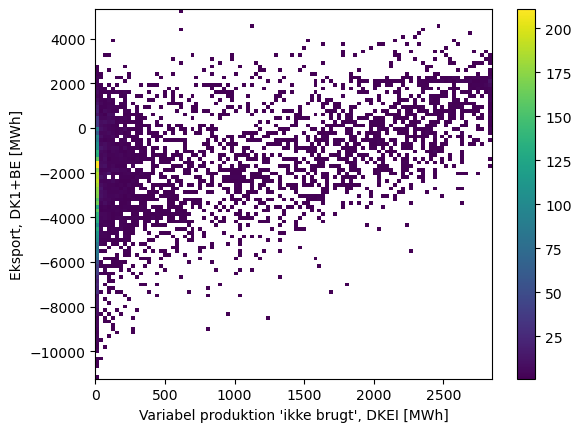

In [23]:
excessDKEI = res.getColumn("DKEI_varSurplus")+res.getColumn("DKEI_netImport")
export = -res.getColumn("BE_netImport")-res.getColumn("DK1_netImport")
fig, ax = plt.subplots()
h = ax.hist2d(excessDKEI, export, bins=100,cmin = 1)
fig.colorbar(h[3], ax=ax)
ax.set_xlabel("Variabel produktion 'ikke brugt', DKEI [MWh]")
ax.set_ylabel("Eksport, DK1+BE [MWh]")